In [1]:
import couchdb
import csv
import re
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
secure_remote_server = couchdb.Server('')
db = secure_remote_server['anc5']

In [3]:
[x for x in db][-5:]

['sample:0000016152',
 'sample:0000016153',
 'sample:0000016154',
 'sample:0000016155',
 'sample:0000016156']

In [4]:
list_ids  = [id for id in db]
# def flatten_json(y):
#     out = {}

#     def flatten(x, name=''):
#         if type(x) is dict:
#             for a in x:
#                 flatten(x[a], name + a + '_')
#         elif type(x) is list:
#             i = 0
#             for a in x:
#                 flatten(a, name + str(i) + '_')
#                 i += 1
#         else:
#             out[name[:-1]] = x

#     flatten(y)
#     return out

In [5]:
list_ids[2:][:5] #basically .head()

['analysis:0000000000',
 'analysis:0000000001',
 'analysis:0000000002',
 'analysis:0000000003',
 'analysis:0000000004']

In [6]:
types = {'analysis': 0, 'book':0, 'catalog':0, 'institution':0, 'paper':0, 'person':0, 'sample':0}
data=[]
for x in list_ids[2:]:
    lis = x.split(':')
    data.append(lis[0])
    types[lis[0]]+=1

In [7]:
data[2]

'analysis'

In [8]:
types

{'analysis': 7236,
 'book': 1267,
 'catalog': 553,
 'institution': 7,
 'paper': 10,
 'person': 38,
 'sample': 5947}

In [9]:
actual_data = {'analysis': 7236,
 'book': 1267,
 'catalog': 553,
 'sample': 5947}

ref = {'institution': 7,
 'paper': 10,
 'person': 38}


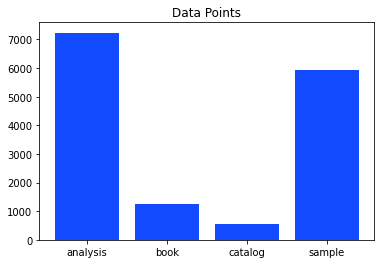

In [31]:
#124aff
plt.bar(actual_data.keys(), actual_data.values(), color = "#124aff")
plt.title('Data Points')
plt.savefig("data.jpg")
plt.show()

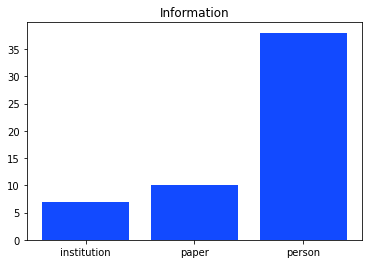

In [32]:
plt.bar(ref.keys(), ref.values(), color = "#124aff")
plt.title('Information')
plt.savefig("info.jpg")
plt.show()